This document is how I conducted my experiments. You will need to run the cells in diffrent orders to get diffrent results. I did this so I didnt have to repeat code. So for example if you want to get the SVM model for 70:30 split run the 70:30 cells and the SVM cell. Make sure you know which cell you ran last. The code works regardless but doesnt expliticy tell which split you ran althoght you can make it out in most cases.


Mustafa Onur Cay 2662884C

In [25]:
!pip3 install -U ucimlrepo

from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score
from sklearn.metrics import precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
x = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets


In [29]:
#Test Split of 80:20 stratified to ensure the B to M ratio is similar.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

#Used for inital testing

In [3]:
#Test Split of 70:30 stratified to ensure the B to M ratio is similar.


#This is what I am using


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [26]:
# Create a Logistic Regression model
lr_model = LogisticRegression(max_iter=4000, random_state=42)

# Train the model on the training data
lr_model.fit(x_train, y_train.squeeze())

# Predict on the test set
y_pred = lr_model.predict(x_test)

# Evaluate the model
print("Logistic Regression Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Results:
Confusion Matrix:
[[106   1]
 [  9  55]]

Classification Report:
              precision    recall  f1-score   support

           B       0.92      0.99      0.95       107
           M       0.98      0.86      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [6]:
# Create an SVM model
svm_model = SVC(random_state=42)

# Train the model on the training data
svm_model.fit(x_train, y_train.squeeze())
# Predict on the test set
y_pred = svm_model.predict(x_test)

# Evaluate the model
print("SVM Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Used for initial testing

SVM Results:
Confusion Matrix:
[[107   0]
 [ 17  47]]

Classification Report:
              precision    recall  f1-score   support

           B       0.86      1.00      0.93       107
           M       1.00      0.73      0.85        64

    accuracy                           0.90       171
   macro avg       0.93      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171



In [10]:
param_grid = [

    {
        'solver': ['lbfgs', 'newton-cg'],
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 20, 100],

    },

    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 20, 100],

    },

    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'C': [0.01, 0.1, 1, 10, 20, 100],
        'l1_ratio': [0.1, 0.5, 0.9],

    }
]

recall_scorer = make_scorer(recall_score, pos_label='M')

logreg = LogisticRegression(random_state=42,max_iter=6000)

grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring=recall_scorer,
    cv=5,
    verbose=2,
    n_jobs=-1,
    error_score = 'raise'
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



print("Here are the runners up")

results = pd.DataFrame(grid_search.cv_results_)
results_sorted = results.sort_values(by="mean_test_score", ascending=False)
print("Top 5 Parameter Combinations by Recall:")
print(results_sorted[['mean_test_score', 'param_penalty', 'param_C', 'param_solver', 'param_l1_ratio']].head(5))

Fitting 5 folds for each of 78 candidates, totalling 390 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'C': 20, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Recall Score: 0.9255172413793102
Confusion Matrix:
[[105   2]
 [  8  56]]

Classification Report:
              precision    recall  f1-score   support

           B       0.93      0.98      0.95       107
           M       0.97      0.88      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Here are the runners up
Top 5 Parameter Combinations by Recall:
    mean_test_score param_penalty  param_C param_solver  param_l1_ratio
22         0.925517            l1    100.0    liblinear             NaN
21         0.925517            l2     20.0    liblinear             NaN
8          0.925517            l2     20.0        lbfgs             NaN
9          0.925517            l2     20.0    newton-cg             NaN
10         0.925517            l2    100.0        lbfgs             NaN


In [27]:
#Default Model
y_probs = lr_model.predict_proba(x_test)[:, 1]

In [ ]:
#Best Model
y_probs = best_model.predict_proba(x_test)[:, 1]


Threshold: 0.1
Precision: 0.91
Recall: 0.98

Classification Report:
              precision    recall  f1-score   support

           B       0.99      0.94      0.97       107
           M       0.91      0.98      0.95        64

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


Threshold: 0.2
Precision: 0.94
Recall: 0.94

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96       107
           M       0.94      0.94      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171


Threshold: 0.3
Precision: 0.97
Recall: 0.92

Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       107
           M       0.97      0

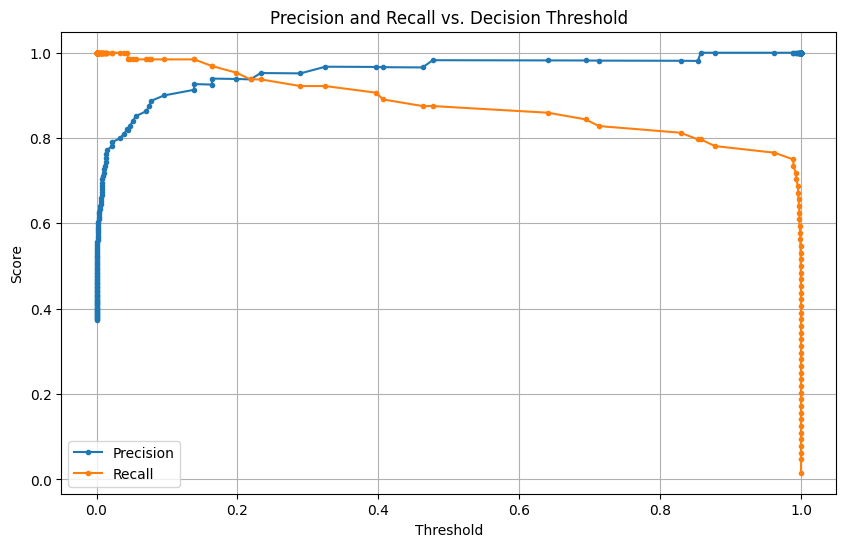

In [28]:
#Model calibration using decision threshold adjustment
predicted_labels = np.array(['B', 'M'])
thresholds = np.arange(0.1, 1.0, 0.1)

for threshold in thresholds:
    y_pred_threshold = (y_probs >= threshold).astype(int)
    y_pred_labels = predicted_labels[y_pred_threshold]

    print(f"\nThreshold: {threshold:.1f}")
    print(f"Precision: {precision_score(y_test, y_pred_labels, pos_label='M'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred_labels, pos_label='M'):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_labels))



precision, recall, thresholds = precision_recall_curve(y_test, y_probs, pos_label='M')

# Plot precision and recall as functions of the threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision", marker='.')
plt.plot(thresholds, recall[:-1], label="Recall", marker='.')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Decision Threshold")
plt.legend()
plt.grid()
plt.show()